In [1]:
from datasets import load_dataset
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd
import re

c:\Users\Masta\Documents\sentiment-analysis-llm-ml\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def load_imdb_dataset():
    dataset = load_dataset("imdb")
    test_df = pd.DataFrame(dataset['test'])
    train_df = pd.DataFrame(dataset['train'])
    return train_df, test_df


In [3]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

In [5]:
def imdb_ml_analysis():
    test_df, train_df = load_imdb_dataset()
    train_df['cleaned_text'] = train_df['text'].apply(clean_text)
    test_df['cleaned_text'] = test_df['text'].apply(clean_text)

    # Vectorization
    vectorizer = TfidfVectorizer(max_features=5000)
    X_train = vectorizer.fit_transform(train_df['cleaned_text'])
    X_test = vectorizer.transform(test_df['cleaned_text'])
    Y_train = train_df['label']
    Y_test = test_df['label']

    # Model training
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)


    cm = confusion_matrix(Y_test, y_pred)

    # Plot prediction confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Negative', 'Positive'])
    disp.plot(cmap='Blues')
    print("Accuracy:", accuracy_score(Y_test, y_pred))
    print("Classification Report:\n", classification_report(Y_test, y_pred))

Accuracy: 0.8774
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.87      0.88     12500
           1       0.88      0.88      0.88     12500

    accuracy                           0.88     25000
   macro avg       0.88      0.88      0.88     25000
weighted avg       0.88      0.88      0.88     25000



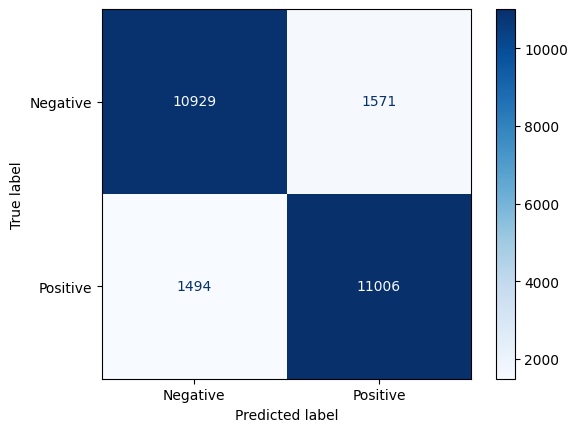

In [6]:
imdb_ml_analysis()